Yalnızca tek bir katman içeren İleri Beslemeli Sinir Ağı modeli

Gereksinimler:

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install opencv-python
!pip install pandas

Veriyi zip'ten çıkarma:

In [3]:
import zipfile

# zip dosyasının yolu
zip_file_path = "/content/drive/MyDrive/ChestXray.zip"

# zip dosyasını aç
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/veri")

Veriyi parçalara bölme:

In [4]:
import os
import cv2
import numpy as np

def load_data():
    normal_path = '/content/veri/ChestXray/NORMAL'
    pneumonia_path = '/content/veri/ChestXray/PNEUMONIA'
    
    normal_images = []
    pneumonia_images = []
    labels = []
    
    for filename in os.listdir(normal_path):
        img = cv2.imread(os.path.join(normal_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (256, 256))
        normal_images.append(img)
        labels.append(0)
        
    for filename in os.listdir(pneumonia_path):
        img = cv2.imread(os.path.join(pneumonia_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (256, 256))
        pneumonia_images.append(img)
        labels.append(1)
        
    normal_images = np.array(normal_images)
    pneumonia_images = np.array(pneumonia_images)
    labels = np.array(labels)
    
    return normal_images, pneumonia_images, labels
normal_images,pneumonia_images,labels=load_data()

Veriyi train-test olarak bölme:

In [5]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense

all_images = np.concatenate((normal_images, pneumonia_images))
all_images = np.expand_dims(all_images, axis=-1) # kanal boyutunu ekleyin
all_labels = np.concatenate((np.zeros(len(normal_images)), np.ones(len(pneumonia_images))))
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2)

İleri Beslemeli Sinir Ağı modeli ve eğitim:

In [12]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model = Sequential([
    Flatten(input_shape=(256, 256, 1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,batch_size=64,callbacks=[early_stop])

Epoch 1/40
42/42 [==============================] - 2s 18ms/step - loss: 1496.7469 - accuracy: 0.6749 - val_loss: 98.2658 - val_accuracy: 0.8741
Epoch 2/40
42/42 [==============================] - 0s 12ms/step - loss: 56.6671 - accuracy: 0.8975 - val_loss: 41.9632 - val_accuracy: 0.9014
Epoch 3/40
42/42 [==============================] - 0s 12ms/step - loss: 60.8515 - accuracy: 0.8678 - val_loss: 516.1230 - val_accuracy: 0.5175
Epoch 4/40
42/42 [==============================] - 0s 12ms/step - loss: 87.4641 - accuracy: 0.8561 - val_loss: 325.3105 - val_accuracy: 0.6146
Epoch 5/40
42/42 [==============================] - 0s 11ms/step - loss: 100.8768 - accuracy: 0.8504 - val_loss: 39.8836 - val_accuracy: 0.9272
Epoch 6/40
42/42 [==============================] - 1s 12ms/step - loss: 35.4183 - accuracy: 0.9073 - val_loss: 32.8209 - val_accuracy: 0.9135
Epoch 7/40
42/42 [==============================] - 0s 12ms/step - loss: 20.3428 - accuracy: 0.9275 - val_loss: 31.1789 - val_accuracy: 0

Loss-Accuracy tablosu:

<Axes: >

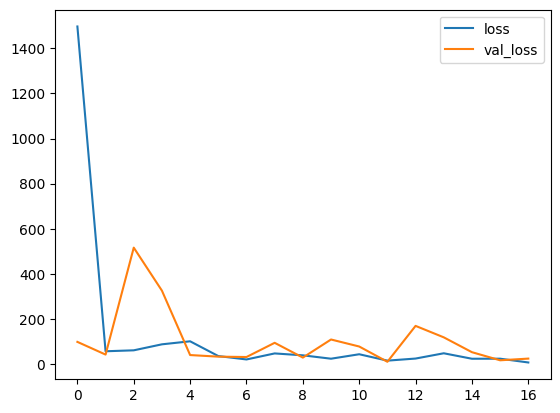

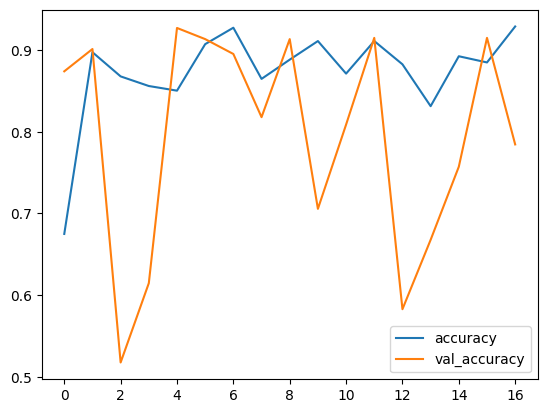

In [13]:
import pandas as pd
df = pd.DataFrame(model.history.history)
loss=df.drop(["accuracy","val_accuracy"],axis=1)
accuracy=df.drop(["loss","val_loss"],axis=1)
loss.plot()
accuracy.plot()

Test:

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

21/21 [==============================] - 0s 4ms/step - loss: 24.1396 - accuracy: 0.7845
Test Loss: 24.13956069946289
Test Accuracy: 0.7845219969749451
